In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns


In [40]:
# Import the data
df = pd.read_csv("../data/artist_data.csv")  #..(relative path, goes to the parent directory) vs. C:Users (absolute path)

### Data cleaning 

In [41]:
# Set some global options so we always see all of the columns and rows when we print something out
pd.set_option('display.max_columns', 100) # 100 cols
pd.set_option('display.max_rows', 50) # 50 rows
print(df.head)

<bound method NDFrame.head of          id                    name  gender      dates  yearOfBirth   
0     10093  Abakanowicz, Magdalena  Female  born 1930       1930.0  \
1         0     Abbey, Edwin Austin    Male  1852–1911       1852.0   
2      2756        Abbott, Berenice  Female  1898–1991       1898.0   
3         1  Abbott, Lemuel Francis    Male  1760–1803       1760.0   
4       622          Abrahams, Ivor    Male  born 1935       1935.0   
...     ...                     ...     ...        ...          ...   
3527  12542         Zorio, Gilberto    Male  born 1944       1944.0   
3528   2186              Zox, Larry    Male  born 1936       1936.0   
3529    621   Zuccarelli, Francesco    Male  1702–1788       1702.0   
3530   2187        Zuloaga, Ignacio    Male  1870–1945       1870.0   
3531   2188         Zyw, Aleksander    Male  1905–1995       1905.0   

      yearOfDeath                    placeOfBirth            placeOfDeath   
0             NaN                       

<Axes: >

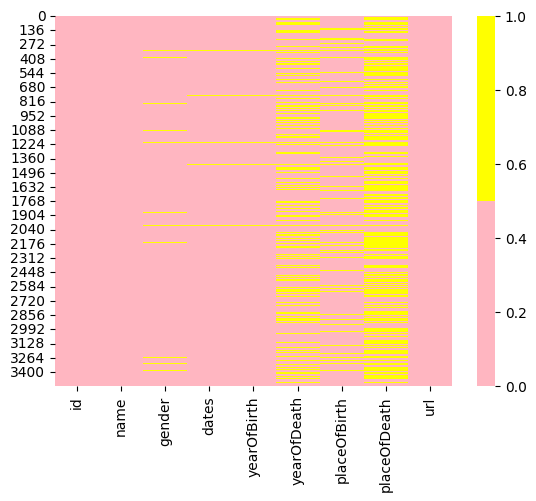

In [42]:
cols = df.columns[:30] # Select the first 30 columns
colours = ['#ffb6c1', '#ffff00'] # Specify the colours, where yellow is missing and pink is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours)) # Make a heatmap


Checking for unique values and spelling mistakes.


In [43]:
# Check unique values in the 'gender' column
unique_genders = df['gender'].unique()
print(unique_genders)

['Female' 'Male' nan]


Checking if the gender and the year of birth collum has any has outliers

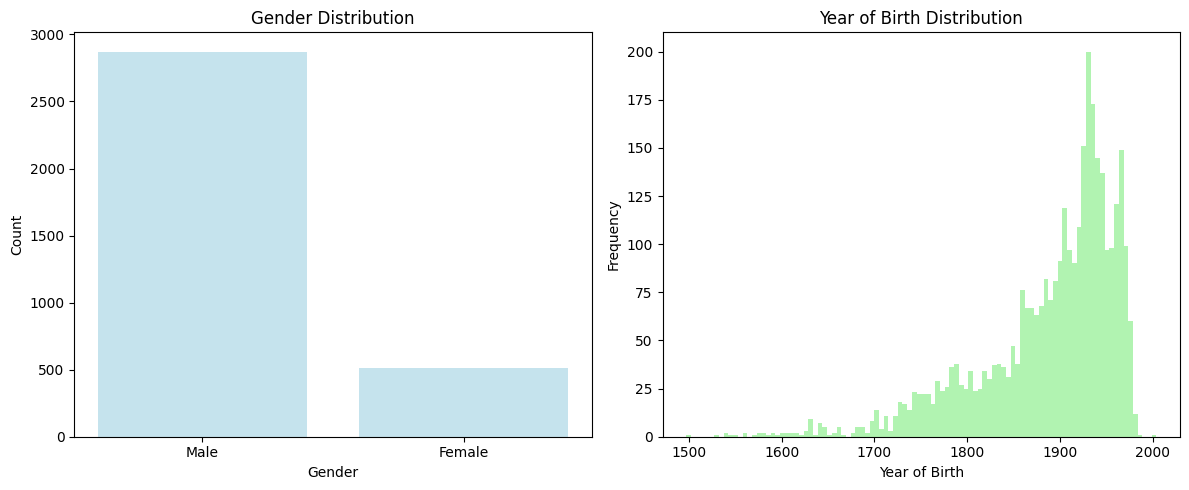

In [6]:
df = df.dropna(subset=['gender', 'yearOfBirth'])

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Create the bar plot for 'gender' in the first subplot
gender_counts = df['gender'].value_counts()
axes[0].bar(gender_counts.index, gender_counts.values, color='#ADD8E6', alpha=0.7)
axes[0].set_title('Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

# Create the histogram for 'yearOfBirth' in the second subplot
axes[1].hist(df['yearOfBirth'], bins=100, color='#90EE90', alpha=0.7)
axes[1].set_title('Year of Birth Distribution')
axes[1].set_xlabel('Year of Birth')
axes[1].set_ylabel('Frequency')

# Display the figure with the plots
plt.tight_layout()
plt.show()




Visualize gender and the relationship with the year of birth

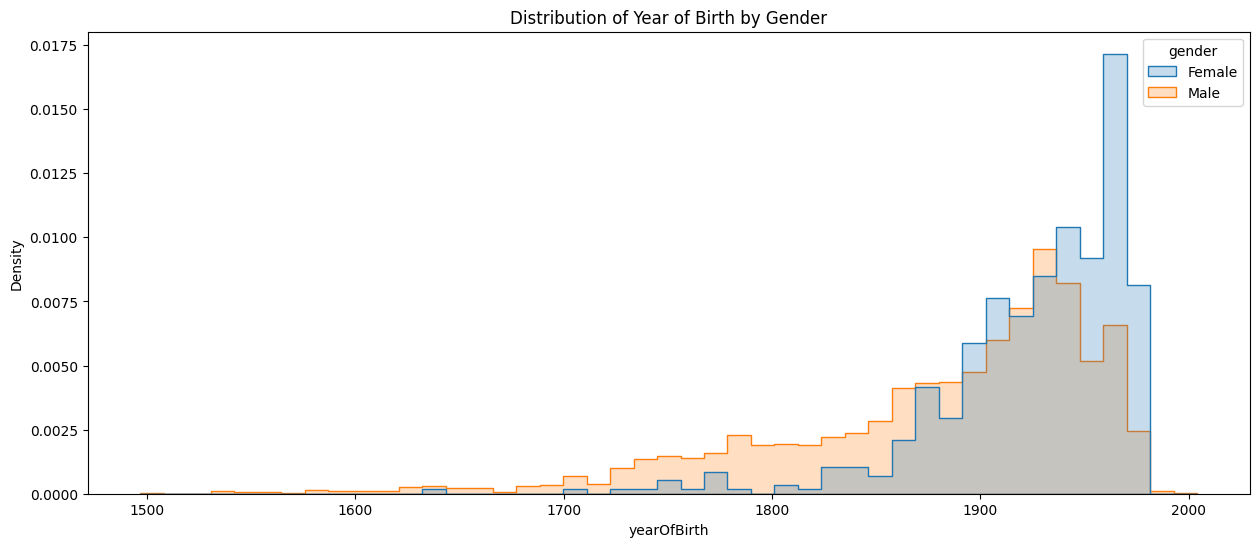

In [7]:
plt.figure(figsize=(15, 6))
sns.histplot(data=df, x="yearOfBirth", hue="gender", element="step", stat="density", common_norm=False)
plt.title("Distribution of Year of Birth by Gender")
plt.show()

Looking at the yearOfBirth NA values.

In [46]:
# Mask rows where 'gender' column has nan values
mask = df['yearOfBirth'].isnull()

# Filter the DataFrame using the mask
no_year_info = df[mask]

# Display the filtered DataFrame
print(no_year_info[['name', 'yearOfBirth']])


                                                   name  yearOfBirth
70                                            Anonymous          NaN
76    Ant Farm (Chip Lord, born 1944, Doug Michels, ...          NaN
256                                 Berkeley, Rev C J R          NaN
287                                       Black, Sheila          NaN
327                                            Booth, L          NaN
...                                                 ...          ...
3257                                            V.Ch.K.          NaN
3275                                               Vara          NaN
3301                                       Villers, Dee          NaN
3305                                   Vivares, Francis          NaN
3451                                   Wolff, Christian          NaN

[60 rows x 2 columns]


Looking at the gender with NaN values


In [47]:
# Create a boolean mask for rows where 'gender' is NaN
mask = df['gender'].isnull()

# Use the mask to filter the DataFrame
no_gender_info = df[mask]

# Display the filtered DataFrame
print(no_gender_info[['name', 'gender']])

                                                   name gender
70                                            Anonymous    NaN
84                                     Arakawa, Shusaku    NaN
105   Art & Language (Michael Baldwin, born 1945; Me...    NaN
106   Art & Language (Terry Atkinson, born 1939; Dav...    NaN
107   Art & Language (Terry Atkinson, born 1939; Mic...    NaN
...                                                 ...    ...
3319                                    Wakely, Shelagh    NaN
3386                                Westmacott, Richard    NaN
3495                                      Yalenti, José    NaN
3509  Young-Hae Chang Heavy Industries (Young-Hae Ch...    NaN
3522                           Ziolkowski, Jakub Julian    NaN

[116 rows x 2 columns]


Filter out the  'yearOfBirth' NaN vaules

In [50]:
# Create a new DataFrame without rows where 'yearOfBirth' is NaN
df_without_nan = df[df['yearOfBirth'].notna()]


## Sort the year of birth into five periods

Dividing the yearOfBirth into five periods, left with 3472 rows × 10 columns. 3532(orginal rows)-3472(new rows) = 60 which matches the NaN values of 'yearOfBirth'

In [61]:
df_without_nan = df[df['yearOfBirth'].notna()].copy()

# Define the bins for the year ranges
bins = pd.interval_range(start=df_without_nan['yearOfBirth'].min(), end=df_without_nan['yearOfBirth'].max(), periods=5)

# Creating a new column 'period' to store the bins
df_without_nan['period'] = pd.cut(df_without_nan['yearOfBirth'], bins)


Looking at the new NaN vlaues in gender after removing the NaN values in yearOfBirth and diving it into 5 periods.

In [59]:
# Create a boolean mask for rows where 'gender' is NaN
mask = df_without_nan['gender'].isnull()

# Use the mask to filter the DataFrame
no_gender_info_new = df_without_nan[mask]

# Display the filtered DataFrame
print(no_gender_info_new[['name', 'gender']])

                                                   name gender
84                                     Arakawa, Shusaku    NaN
105   Art & Language (Michael Baldwin, born 1945; Me...    NaN
106   Art & Language (Terry Atkinson, born 1939; Dav...    NaN
107   Art & Language (Terry Atkinson, born 1939; Mic...    NaN
120                                         Atlas Group    NaN
...                                                 ...    ...
3319                                    Wakely, Shelagh    NaN
3386                                Westmacott, Richard    NaN
3495                                      Yalenti, José    NaN
3509  Young-Hae Chang Heavy Industries (Young-Hae Ch...    NaN
3522                           Ziolkowski, Jakub Julian    NaN

[88 rows x 2 columns]


### Draw Graph

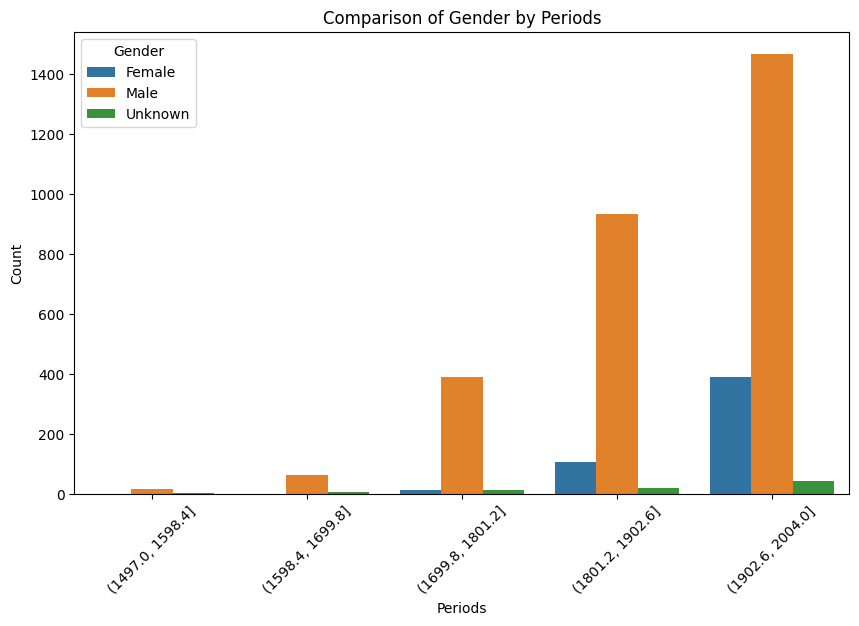

In [62]:
# Replace the NaN values in the 'gender' column with the string 'Unknown'
df_without_nan['gender'].fillna('Unknown', inplace=True)

# Create a countplot with 'period' on the x-axis and the count of each 'gender' as the bars
plt.figure(figsize=(10, 6))
sns.countplot(x='period', hue='gender', data=df_without_nan)

# Adding labels and title
plt.xlabel('Periods')
plt.ylabel('Count')
plt.title('Comparison of Gender by Periods')
plt.xticks(rotation=45)
plt.legend(title='Gender')

# Show plot
plt.show()

### Sorting them to summarised data sets

In [63]:
# Create pivot table
pivot_table = pd.pivot_table(df_without_nan, values='name', index='period', columns='gender', aggfunc='count', fill_value=0)

# Resetting the index for better formatting
pivot_table.reset_index(inplace=True)

# Renaming the columns
pivot_table.columns.name = None  # remove the name for columns
pivot_table = pivot_table.rename(columns={"Unknown": "Unknown", "Male": "Male", "Female": "Female", "period": "Period"})

# This is the summarized data frame you are looking for
print(pivot_table)

             Period  Female  Male  Unknown
0  (1497.0, 1598.4]       0    16        3
1  (1598.4, 1699.8]       1    64        6
2  (1699.8, 1801.2]      13   390       14
3  (1801.2, 1902.6]     106   934       20
4  (1902.6, 2004.0]     392  1467       45
